In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter,defaultdict
from script_helper import plot,plot_freq,Clean_Data, data_alloc, compute_entropy,total,compute_l2,compute_KL_distance,find_max
import os


In [2]:

### 1 ### access the file
#TODO: access the file directly in s3 (need aws access key & secret access key)
json_data = []
path = "data/"
for i in range(24,31):
    cur_path = os.path.join(path,"6_%d/part-00000.dms"%(i))
    print(cur_path)
    with open(cur_path) as json_file:
        for line in json_file:
            json_data.append(json.loads(line))
with open("data/2019-06-27.10_00_59_059.full.Program.json") as f:
    id_name_lookup = {}
    for line in f:
        info = json.loads(line)
        if ("_id" in info) and ("_source" in info):
            id_name_lookup[info["_id"]] = info
            
with open("data/1558445451-entity.json") as f:
    id_name_lookup2 = {}
    for line in f:
        info = json.loads(line)
        if ("_id" in info) and ("_source" in info):
            id_name_lookup2[info["_id"]] = info
            
print("number of data points: ",len(json_data))

### 2 ### clean data and insert program names
Clean_Data(json_data)
count = 0
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    programid = instance[n]["programId"]
    if programid in id_name_lookup:
        count += 1
        json_data[i][n]["programName"] = id_name_lookup[programid]["_source"]["name"]
        # print(id_name_lookup[programid]["_source"]["name"])
    else:
        json_data[i][n]["programName"] = ""
print(count)
print(count/len(json_data))
def data_alloc(idx1,idx2):
    tmp = defaultdict(lambda: defaultdict(int))
    for i in range(len(dataset)):
        queries = dataset[i][idx1]
        to = dataset[i][idx2]
        if isinstance(queries,list):
            n = len(queries)-1
            queries = queries[n]
        if isinstance(to,list):
            to = to[0]
        n = len(queries)-1
        tmp[queries][to] +=1
    return tmp

data/6_24/part-00000.dms
data/6_25/part-00000.dms
data/6_26/part-00000.dms
data/6_27/part-00000.dms
data/6_28/part-00000.dms
data/6_29/part-00000.dms
data/6_30/part-00000.dms
number of data points:  990507
331293
0.33446810572767277


In [5]:
count = 0
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    programid = instance[n]["programId"]
    if programid in id_name_lookup2:
        count += 1
        json_data[i][n]["programName"] = id_name_lookup2[programid]["_source"]["name"]
        # print(id_name_lookup[programid]["_source"]["name"])

In [6]:
print(count)

280145
280145
280145
280145


In [11]:
c = 0
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    if json_data[i][n]["programName"] == '':
        c+=1
print("there are %d program id instance that don't have a correspond name"%(c))
print("so %d have a name" %(len(json_data)-c))

there are 657169 program id instance that don't have a correspond name
so 333338 have a name
there are 657169 program id instance that don't have a correspond name
so 333338 have a name
there are 657169 program id instance that don't have a correspond name
so 333338 have a name
there are 657169 program id instance that don't have a correspond name
so 333338 have a name


In [12]:
### 3 ### explore the data

# list of tuples: [([queries], programId, programName) ... ] 
dataset = []
for i in range(len(json_data)):
    instance = json_data[i]
    n = len(instance)-1
    queries = []
    for j in range(n):
        queries.append(instance[j]["transcription"])
    companyname = instance[n]["companyName"]
    programname = instance[n]["programName"]
    #instance[n]["programId"]
    if programname == "":
        programname = instance[n]["programId"]
    dataset.append((queries, companyname,programname))
del json_data
all_query = [0]*len(dataset)
for idx,each in enumerate(dataset):
    all_query[idx] = each[0][0]

# Overall Statistics

### Query Top Freq

In [16]:
all_query = [0]*len(dataset)
for idx,each in enumerate(dataset):
    all_query[idx] = each[0][0]
counted_query = Counter(all_query)
print("unique number of queries: %d" %(len(counted_query)))
print("unique number of queries percentage: %f " %(len(counted_query)/len(dataset)))

unique number of queries: 60307
unique number of queries percentage: 0.060885 
unique number of queries: 60307
unique number of queries percentage: 0.060885 
unique number of queries: 60307
unique number of queries percentage: 0.060885 
unique number of queries: 60307
unique number of queries percentage: 0.060885 


In [7]:
print(all_query[:10])

['YouTube', 'Fox News', 'YouTube', 'Hallmark', 'Perry Mason', 'Recordings', 'Recordings', 'Netflix', 'YouTube', 'Netflix']
['YouTube', 'Fox News', 'YouTube', 'Hallmark', 'Perry Mason', 'Recordings', 'Recordings', 'Netflix', 'YouTube', 'Netflix']
['YouTube', 'Fox News', 'YouTube', 'Hallmark', 'Perry Mason', 'Recordings', 'Recordings', 'Netflix', 'YouTube', 'Netflix']
['YouTube', 'Fox News', 'YouTube', 'Hallmark', 'Perry Mason', 'Recordings', 'Recordings', 'Netflix', 'YouTube', 'Netflix']


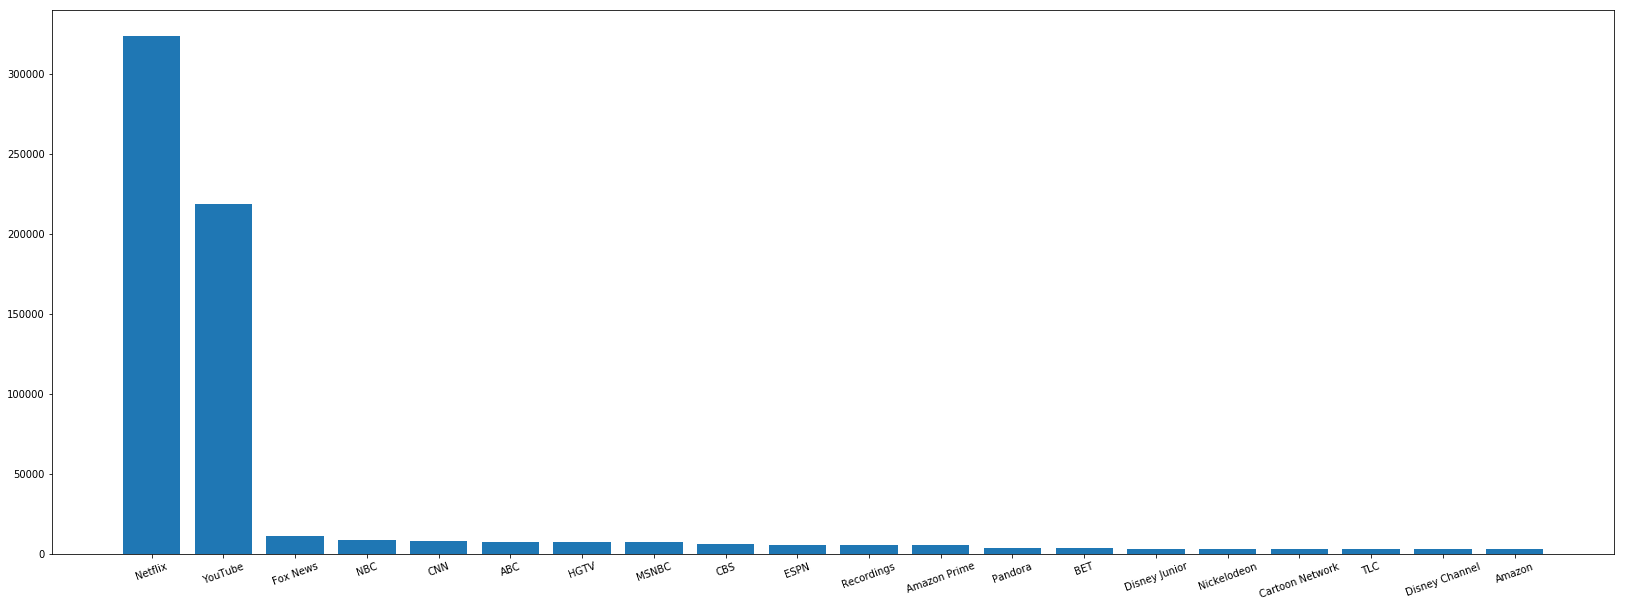

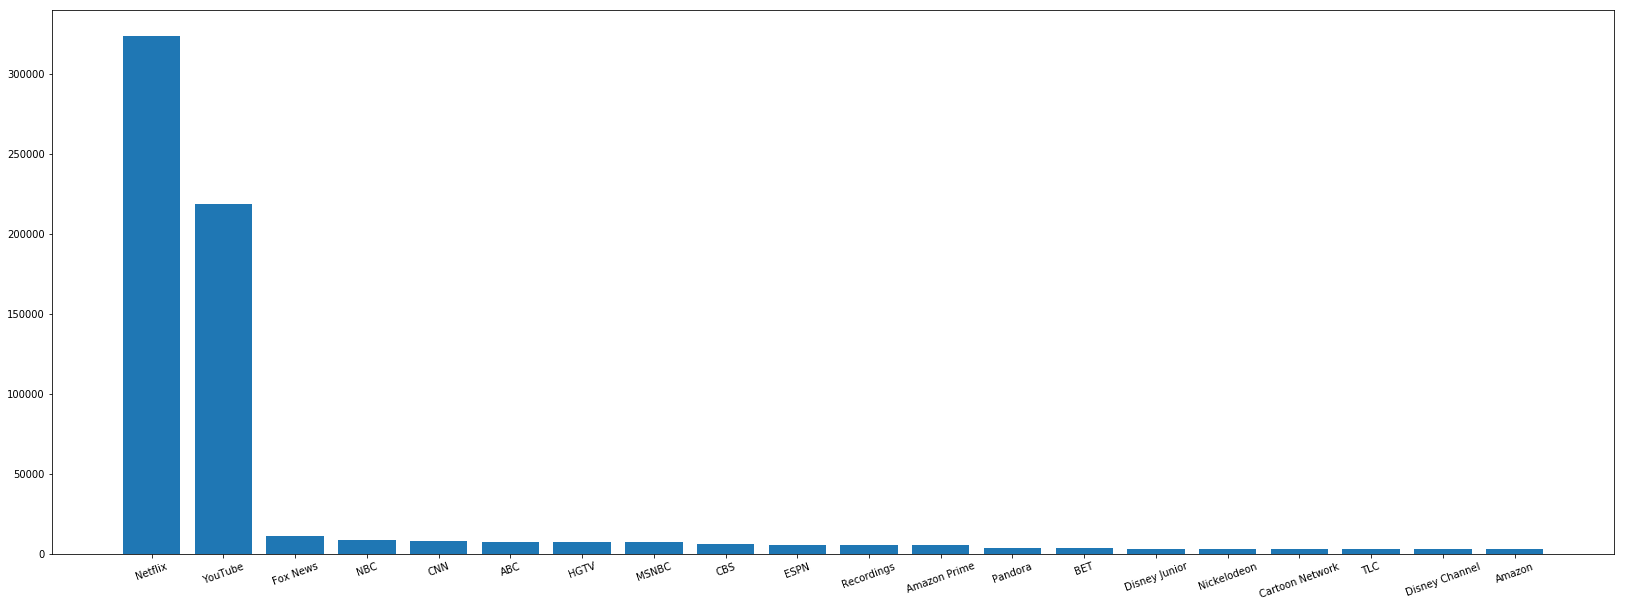

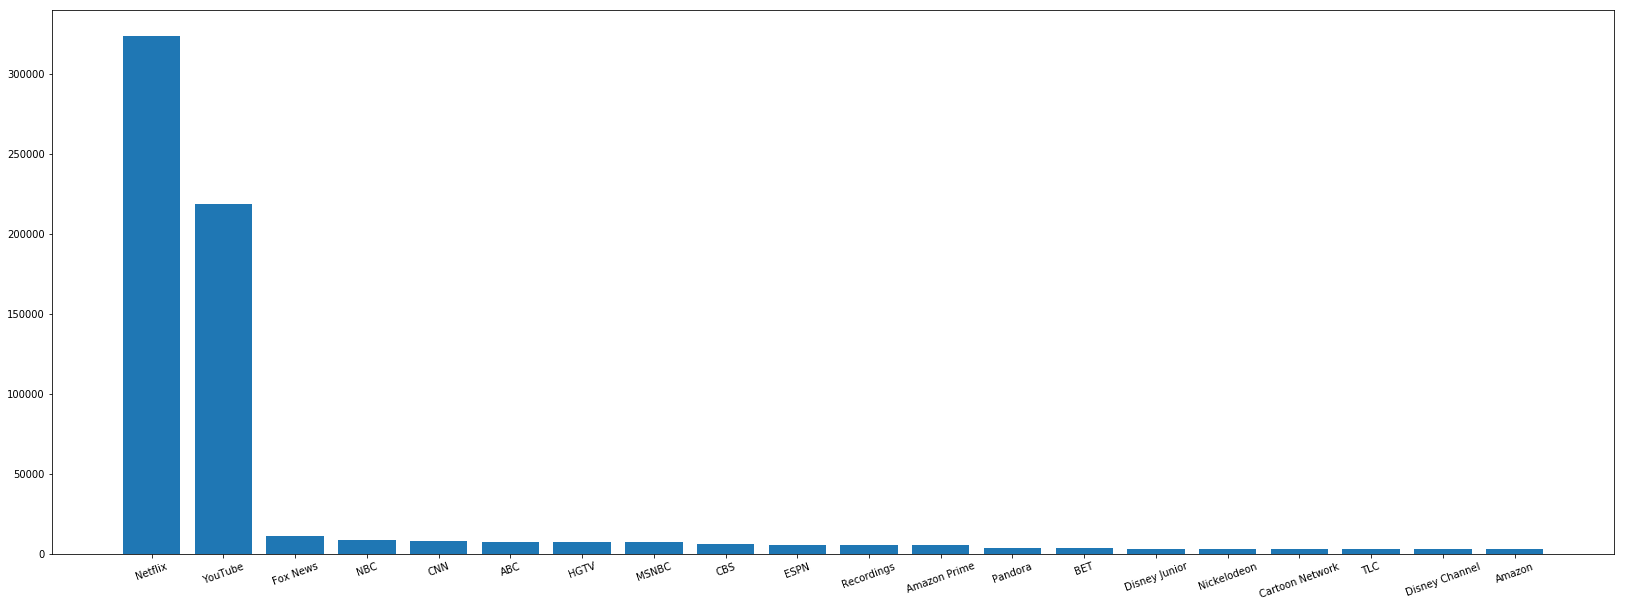

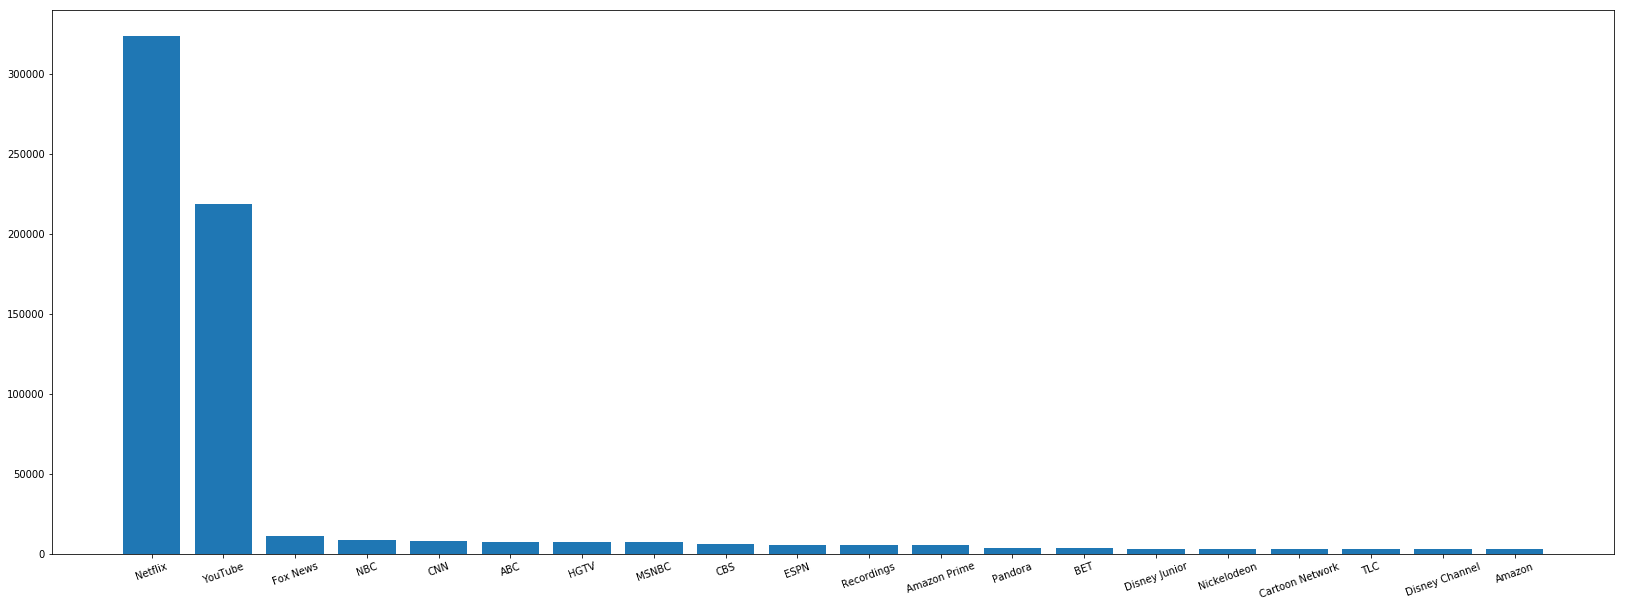

In [8]:
counted_query = {0:counted_query}
plot_freq(counted_query,0,20)
del counted_query
del all_query

### Company Name Top Freq

In [9]:
all_company = [0]*len(dataset)
for idx,each in enumerate(dataset):
    all_company[idx] = each[1]
counted_company = Counter(all_company)
print("unique number of company: %d" %(len(counted_company)))
print("unique number of company percentage: %f " %(len(counted_company)/len(dataset)))

unique number of company: 344
unique number of company percentage: 0.000347 
unique number of company: 344
unique number of company percentage: 0.000347 
unique number of company: 344
unique number of company percentage: 0.000347 
unique number of company: 344
unique number of company percentage: 0.000347 


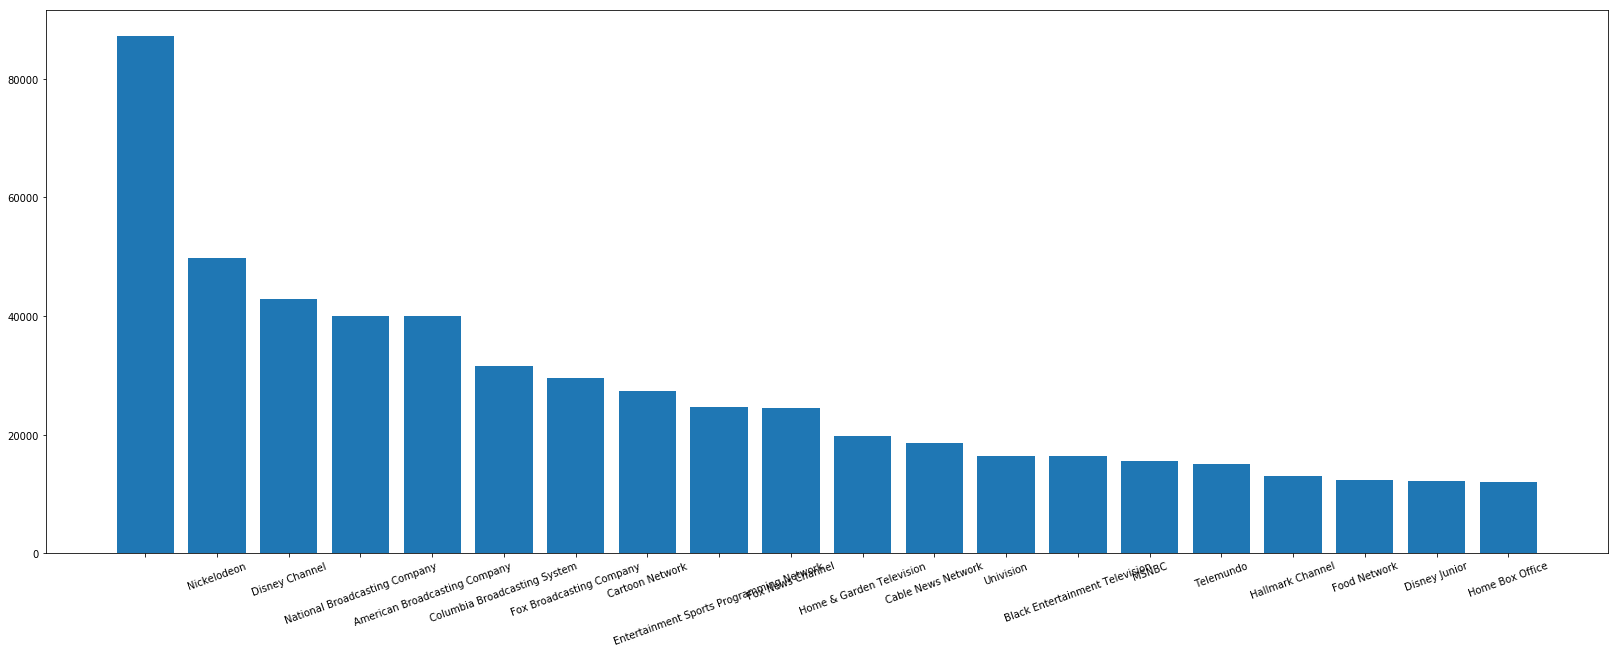

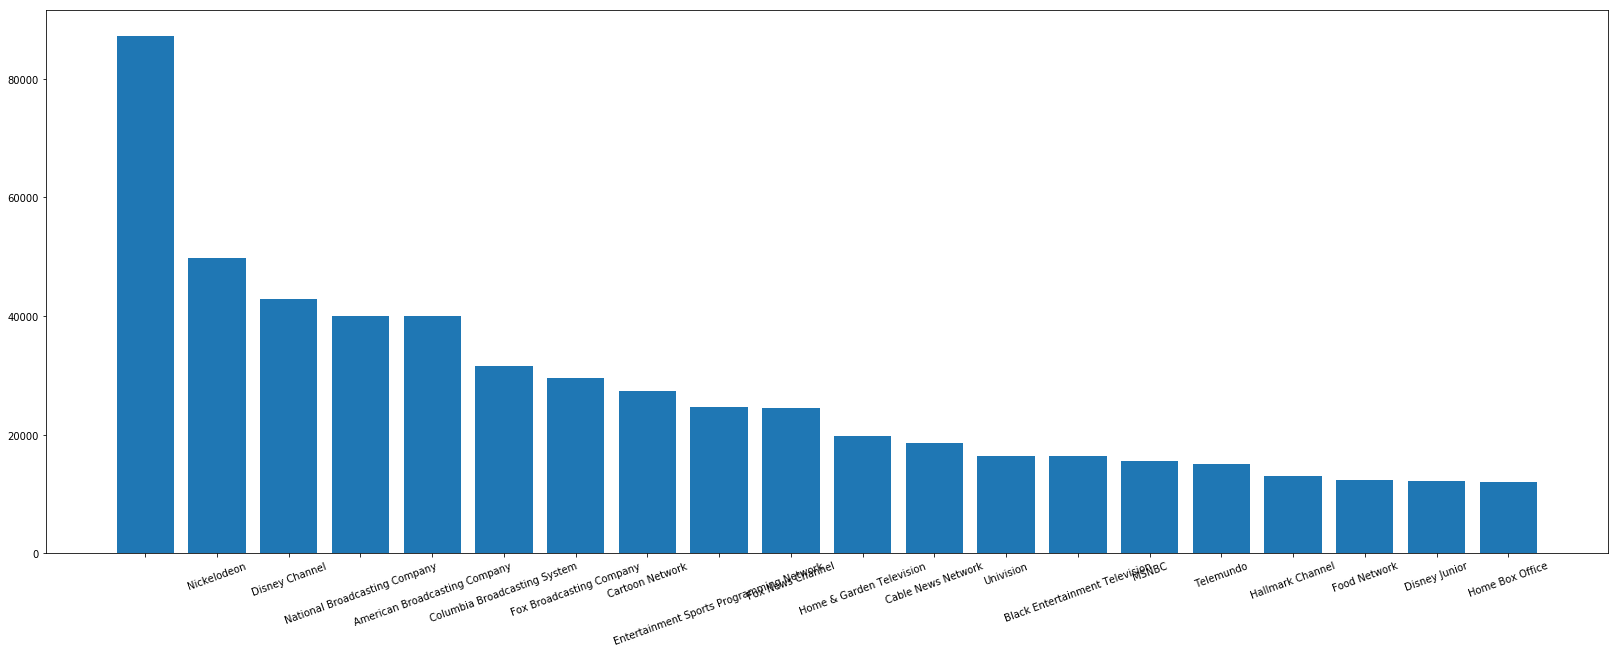

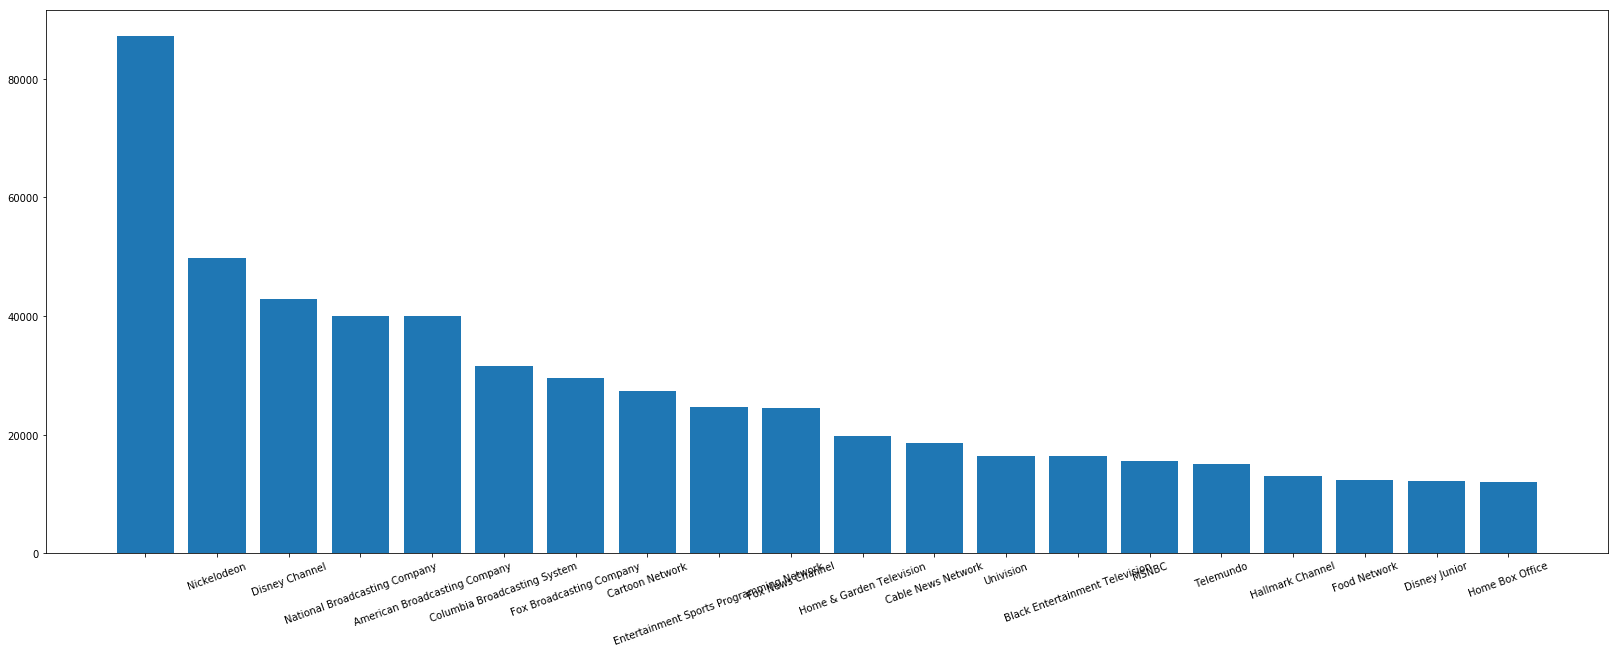

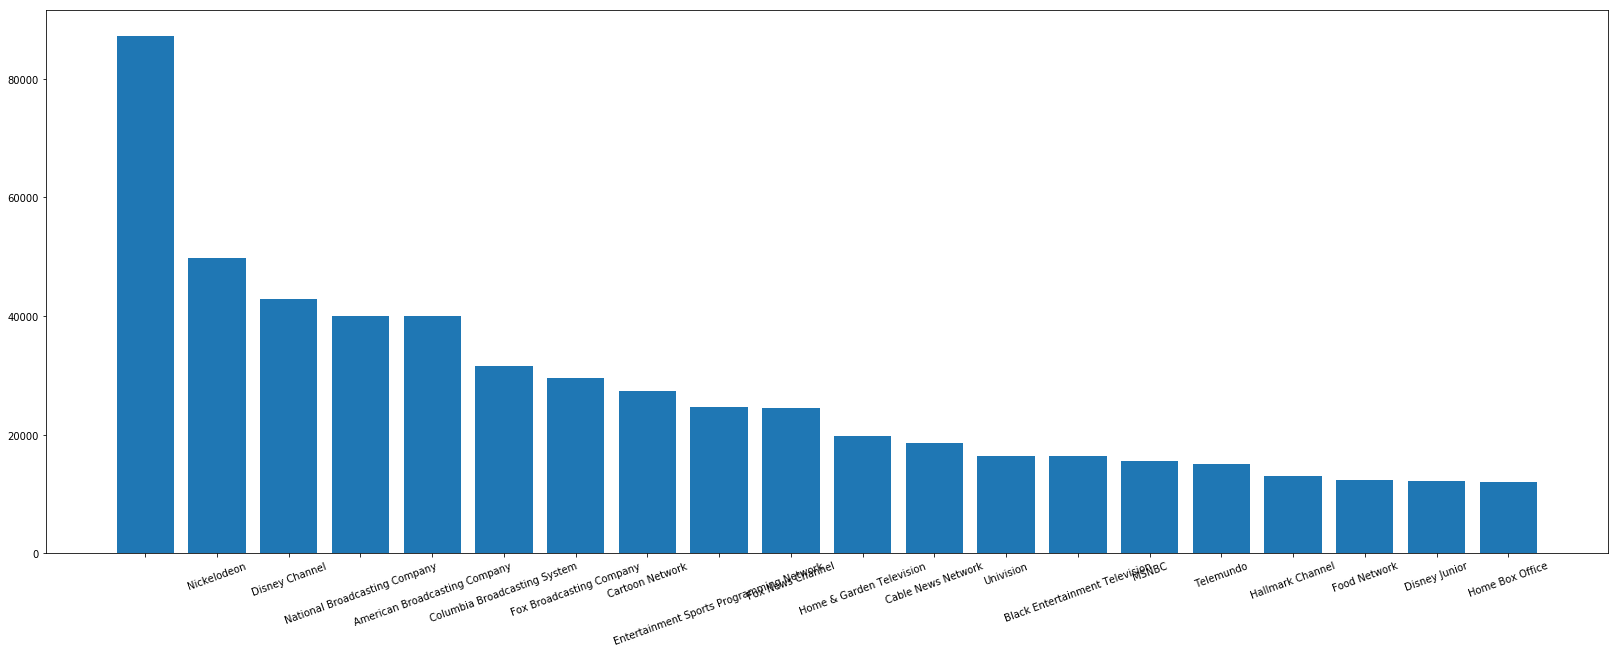

In [10]:
counted_company = {0:counted_company}
plot_freq(counted_company,0,20)
del all_company
del counted_company

### Program Name Top Freq

In [17]:
all_program = [0]* len(dataset)
for idx,each in enumerate(dataset):
    all_program[idx] = each[2]
counted_program = Counter(all_program)
print("unique number of program: %d" %(len(counted_program)))
print("unique number of program percentage: %f " %(len(counted_program)/len(dataset)))

unique number of program: 47246
unique number of program percentage: 0.047699 
unique number of program: 47246
unique number of program percentage: 0.047699 
unique number of program: 47246
unique number of program percentage: 0.047699 
unique number of program: 47246
unique number of program percentage: 0.047699 


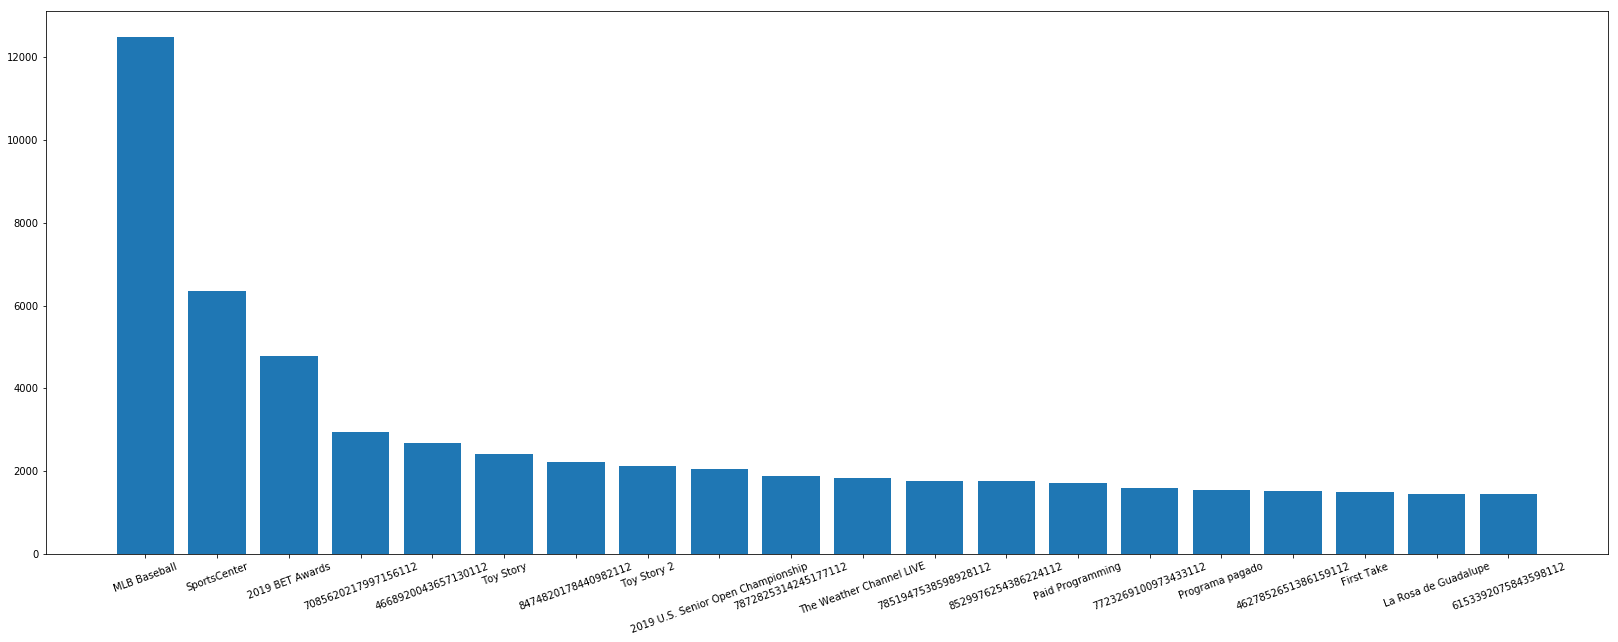

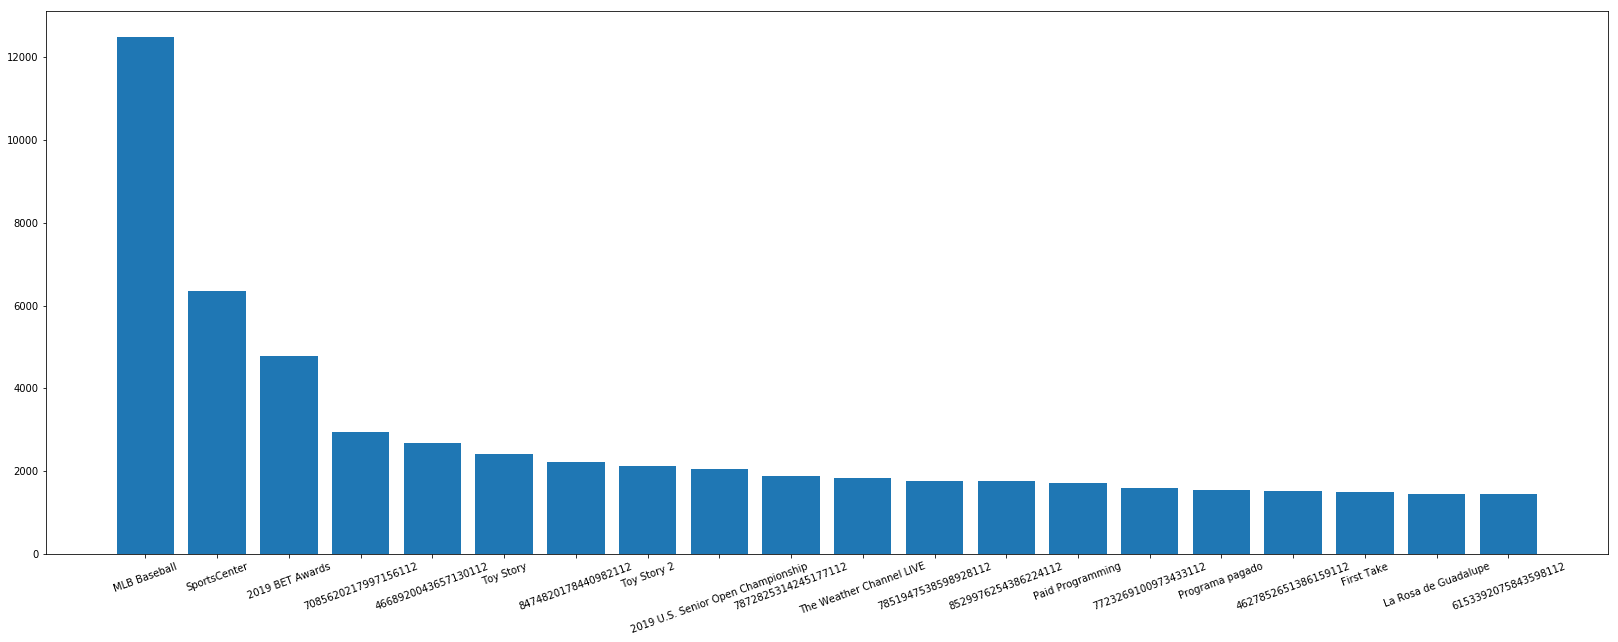

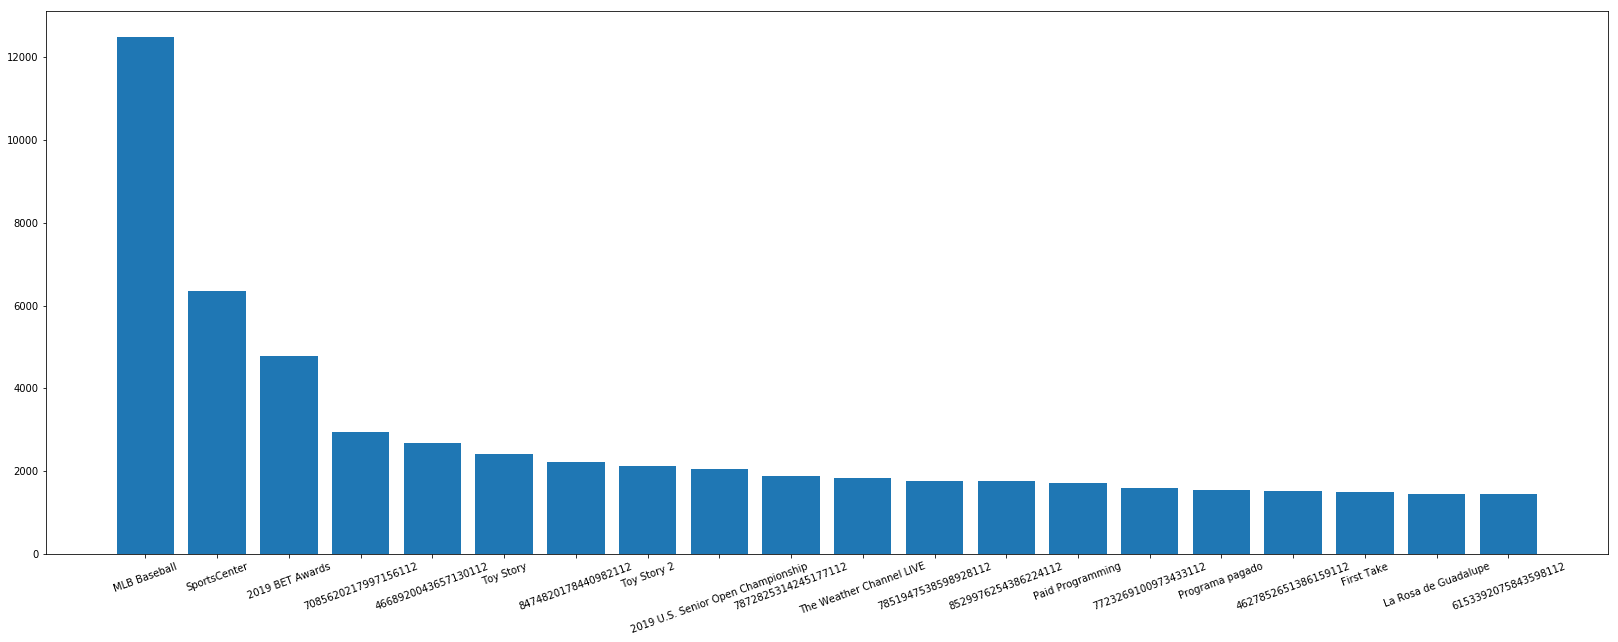

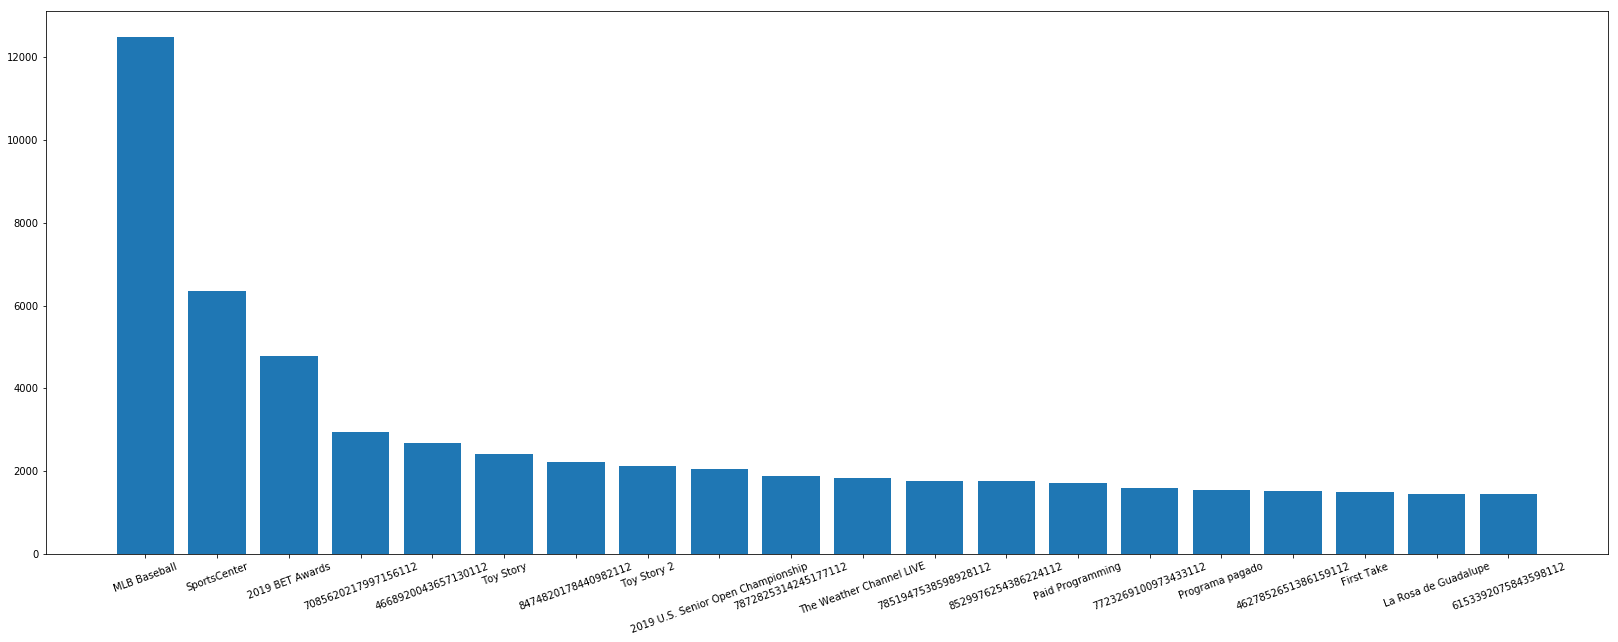

In [18]:
counted_program = {0:counted_program}
plot_freq(counted_program,0,20)
del all_program
del counted_program

# Extract Useful Data

In [13]:
from fractions import Fraction
import math
def data_alloc(idx1,idx2):
    tmp = defaultdict(lambda: defaultdict(int))
    for i in range(len(dataset)):
        queries = dataset[i][idx1]
        to = dataset[i][idx2]
        if isinstance(queries,list):
            n = len(queries)-1
            queries = queries[n]
        if isinstance(to,list):
            to = to[0]
        n = len(queries)-1
        tmp[queries][to] +=1
    return tmp
def plot_freq(arr, key,top, tilt=20, m=""):
    # plot bar graph of top frequency data
    data = Counter(dict(arr[key]))
    data = data.most_common(top)
    
    x = np.arange(len(data))
    freq = [y[1] for y in data]
    label = [y[0] for y in data]
    plt.tight_layout
    plt.figure(figsize=(28,10))
    plt.bar(x,height = freq)
    plt.xticks(x, label,rotation=tilt) # no need to add .5 anymore
    plt.title(m,fontsize=35)
    plt.show()
def compute_entropy(data, key, m, tilt,top = 20):
    data[key].pop("", None)
    if m!="":
        plot_freq(data,key,top,tilt,m)
    data = Counter(dict(data[key]))
    data = data.most_common(top)
    total_count = sum([x[1] for x in data])
    thresh_data = []
    for x in data:
        ratio =Fraction(x[1],total_count)
        # get rid of low percentage options
        if ratio >0.1:
            thresh_data.append(x)
#     print([x[1]/total_count  for x in data])
#     print([x[1]/total_count  for x in thresh_data])
#     print([Fraction(x[1],total_count) *math.log(Fraction(x[1],total_count),2)  for x in data])
    
        
    H = sum([Fraction(x[1],total_count) *math.log(Fraction(x[1],total_count),2)  for x in thresh_data]) * -1
#     print("Entrophy is %f" % (H))
    # penalize channels that have fewer data
#     H += 1.0/total_count if total_count != 0 else 0
    H = H/8.0
    return H

In [14]:
import heapq
def rank(data, method,min_word, top=5,first=1000):
    heap = []
    small_count = []
    for each in data:
        score = methods[method](data,each,"",20,top)
        if total(data[each]) <=1 :
            continue
        if (2<=total(data[each])) and (total(data[each]) <=min_word):
            total_count  = total(data[each])
            tmp = Counter(dict(data[each]))
            most_count = tmp.most_common(1)[0][1]
            ratio = most_count/total_count
            if (ratio>0.5):
                heapq.heappush(small_count, (ratio,each))
            continue
        elif method == "entropy":
            heapq.heappush(heap, (score,each))
        elif method == "l2":
            heapq.heappush(heap, (-score,each))
    return heapq.nsmallest(first,heap),small_count

In [15]:
def rank2(data, top=5,first=1000):
    heap = []
    for each in data:
        score = compute_entropy(data,each,"",20,top)
        if total(data[each]) <=1 :
            continue
        else:
            heapq.heappush(heap, (score,each))

    return heapq.nsmallest(first,heap)

In [16]:
# compare within each number of columns
def rank3(data,top=8,first=1000):
    dict_heap = defaultdict(list)
    for each in data:
        number = len(data[each].keys())
        score = compute_entropy(data,each,"",20,top)
        if number >8:
            number = 8
        heapq.heappush(dict_heap[number], (score,each))
    for each in dict_heap:
        dict_heap[each] = heapq.nsmallest(first,dict_heap[each])
    return dict_heap
# r = rank3(query2company,6,10)

In [117]:
# for each in r:
#     print(each)
#     print(r[each])

In [17]:
query2company = data_alloc(0,1)
query2program = data_alloc(0,2)

In [18]:
print("total number of unique queries %d" %(len(query2company)))
print("total number of queries with exactly 1 data point %d" %(sum([1 if (total(query2company[x])==1) else 0 for x in query2company])))
print("total number of queries with exactly 2 data point %d" %(sum([1 if (total(query2company[x])==2) else 0 for x in query2company])))
print("total number of queries with exactly 3 data point %d" %(sum([1 if (total(query2company[x])==3) else 0 for x in query2company])))

total number of unique queries 53952
total number of unique queries 53952
total number of unique queries 53952
total number of unique queries 53952
total number of queries with exactly 1 data point 40362
total number of queries with exactly 2 data point 4696
total number of queries with exactly 3 data point 2040
total number of queries with exactly 1 data point 40362
total number of queries with exactly 2 data point 4696
total number of queries with exactly 3 data point 2040
total number of queries with exactly 1 data point 40362
total number of queries with exactly 2 data point 4696
total number of queries with exactly 3 data point 2040
total number of queries with exactly 1 data point 40362
total number of queries with exactly 2 data point 4696
total number of queries with exactly 3 data point 2040


In [19]:
methods = {"entropy":compute_entropy,"l2":compute_l2}
result = rank2(query2company,6,53952)

In [20]:
print(len(result))

10352
10352
10352
10352


In [21]:
print(result)

[(-0.0, '10 Cloverfield Lane'), (-0.0, '10 Commandments'), (-0.0, '10 Twisted Tales'), (-0.0, '10 violent Women'), (-0.0, '1006'), (-0.0, '1016'), (-0.0, '1030'), (-0.0, '1061'), (-0.0, '1110'), (-0.0, '1113'), (-0.0, '1127'), (-0.0, '1163'), (-0.0, '1174'), (-0.0, '121'), (-0.0, '1219'), (-0.0, '122'), (-0.0, '1243'), (-0.0, '1250'), (-0.0, '13 news'), (-0.0, '132'), (-0.0, '133'), (-0.0, '1402'), (-0.0, '1404'), (-0.0, '1417'), (-0.0, '1425'), (-0.0, '1426'), (-0.0, '1439'), (-0.0, '1440'), (-0.0, '1455'), (-0.0, '1456'), (-0.0, '1458'), (-0.0, '1459'), (-0.0, '146'), (-0.0, '1465'), (-0.0, '147'), (-0.0, '1472'), (-0.0, '1477'), (-0.0, '1480'), (-0.0, '150'), (-0.0, '152'), (-0.0, '164'), (-0.0, '1655'), (-0.0, '168'), (-0.0, '1701'), (-0.0, '1714'), (-0.0, '1728'), (-0.0, '1755'), (-0.0, '1784'), (-0.0, '1802'), (-0.0, '182'), (-0.0, '1840'), (-0.0, '1876'), (-0.0, '1878'), (-0.0, '201 channel'), (-0.0, '214'), (-0.0, '26 News'), (-0.0, '278'), (-0.0, '280'), (-0.0, '281'), (-0.0, 

[(-0.0, '10 Cloverfield Lane'), (-0.0, '10 Commandments'), (-0.0, '10 Twisted Tales'), (-0.0, '10 violent Women'), (-0.0, '1006'), (-0.0, '1016'), (-0.0, '1030'), (-0.0, '1061'), (-0.0, '1110'), (-0.0, '1113'), (-0.0, '1127'), (-0.0, '1163'), (-0.0, '1174'), (-0.0, '121'), (-0.0, '1219'), (-0.0, '122'), (-0.0, '1243'), (-0.0, '1250'), (-0.0, '13 news'), (-0.0, '132'), (-0.0, '133'), (-0.0, '1402'), (-0.0, '1404'), (-0.0, '1417'), (-0.0, '1425'), (-0.0, '1426'), (-0.0, '1439'), (-0.0, '1440'), (-0.0, '1455'), (-0.0, '1456'), (-0.0, '1458'), (-0.0, '1459'), (-0.0, '146'), (-0.0, '1465'), (-0.0, '147'), (-0.0, '1472'), (-0.0, '1477'), (-0.0, '1480'), (-0.0, '150'), (-0.0, '152'), (-0.0, '164'), (-0.0, '1655'), (-0.0, '168'), (-0.0, '1701'), (-0.0, '1714'), (-0.0, '1728'), (-0.0, '1755'), (-0.0, '1784'), (-0.0, '1802'), (-0.0, '182'), (-0.0, '1840'), (-0.0, '1876'), (-0.0, '1878'), (-0.0, '201 channel'), (-0.0, '214'), (-0.0, '26 News'), (-0.0, '278'), (-0.0, '280'), (-0.0, '281'), (-0.0, 

[(-0.0, '10 Cloverfield Lane'), (-0.0, '10 Commandments'), (-0.0, '10 Twisted Tales'), (-0.0, '10 violent Women'), (-0.0, '1006'), (-0.0, '1016'), (-0.0, '1030'), (-0.0, '1061'), (-0.0, '1110'), (-0.0, '1113'), (-0.0, '1127'), (-0.0, '1163'), (-0.0, '1174'), (-0.0, '121'), (-0.0, '1219'), (-0.0, '122'), (-0.0, '1243'), (-0.0, '1250'), (-0.0, '13 news'), (-0.0, '132'), (-0.0, '133'), (-0.0, '1402'), (-0.0, '1404'), (-0.0, '1417'), (-0.0, '1425'), (-0.0, '1426'), (-0.0, '1439'), (-0.0, '1440'), (-0.0, '1455'), (-0.0, '1456'), (-0.0, '1458'), (-0.0, '1459'), (-0.0, '146'), (-0.0, '1465'), (-0.0, '147'), (-0.0, '1472'), (-0.0, '1477'), (-0.0, '1480'), (-0.0, '150'), (-0.0, '152'), (-0.0, '164'), (-0.0, '1655'), (-0.0, '168'), (-0.0, '1701'), (-0.0, '1714'), (-0.0, '1728'), (-0.0, '1755'), (-0.0, '1784'), (-0.0, '1802'), (-0.0, '182'), (-0.0, '1840'), (-0.0, '1876'), (-0.0, '1878'), (-0.0, '201 channel'), (-0.0, '214'), (-0.0, '26 News'), (-0.0, '278'), (-0.0, '280'), (-0.0, '281'), (-0.0, 

[(-0.0, '10 Cloverfield Lane'), (-0.0, '10 Commandments'), (-0.0, '10 Twisted Tales'), (-0.0, '10 violent Women'), (-0.0, '1006'), (-0.0, '1016'), (-0.0, '1030'), (-0.0, '1061'), (-0.0, '1110'), (-0.0, '1113'), (-0.0, '1127'), (-0.0, '1163'), (-0.0, '1174'), (-0.0, '121'), (-0.0, '1219'), (-0.0, '122'), (-0.0, '1243'), (-0.0, '1250'), (-0.0, '13 news'), (-0.0, '132'), (-0.0, '133'), (-0.0, '1402'), (-0.0, '1404'), (-0.0, '1417'), (-0.0, '1425'), (-0.0, '1426'), (-0.0, '1439'), (-0.0, '1440'), (-0.0, '1455'), (-0.0, '1456'), (-0.0, '1458'), (-0.0, '1459'), (-0.0, '146'), (-0.0, '1465'), (-0.0, '147'), (-0.0, '1472'), (-0.0, '1477'), (-0.0, '1480'), (-0.0, '150'), (-0.0, '152'), (-0.0, '164'), (-0.0, '1655'), (-0.0, '168'), (-0.0, '1701'), (-0.0, '1714'), (-0.0, '1728'), (-0.0, '1755'), (-0.0, '1784'), (-0.0, '1802'), (-0.0, '182'), (-0.0, '1840'), (-0.0, '1876'), (-0.0, '1878'), (-0.0, '201 channel'), (-0.0, '214'), (-0.0, '26 News'), (-0.0, '278'), (-0.0, '280'), (-0.0, '281'), (-0.0, 

In [22]:
# maximum score can be -ln(1/top), which for top =6 is around 1.79.
threshold = 2

list1 = [x[1] for x in result if (float(x[0]) <=threshold)]
training_pairs = [(x,find_max(query2company,x)) for x in list1]

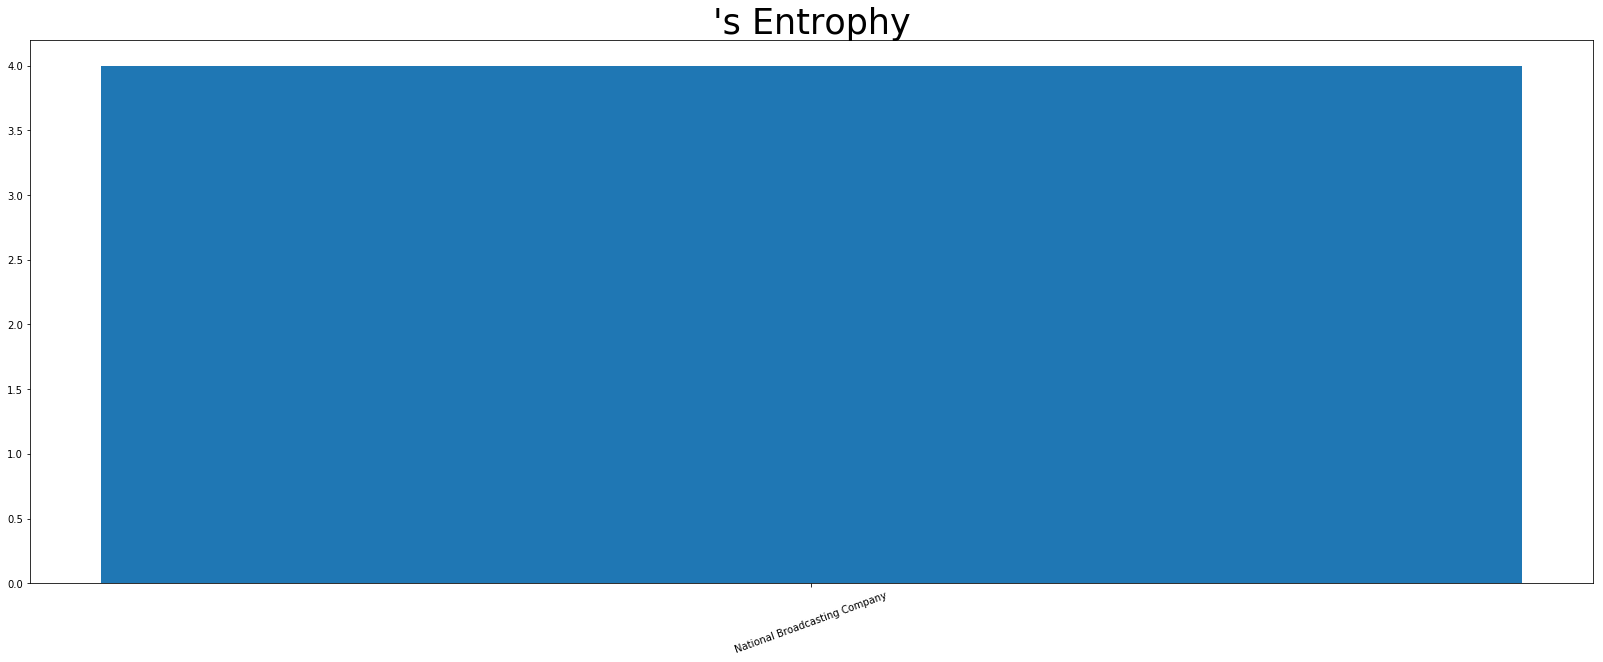

Entrophy is -0.000000


0.25

In [89]:
top = 6
compute_entropy(query2company,"KSHB","'s Entrophy",20,top)

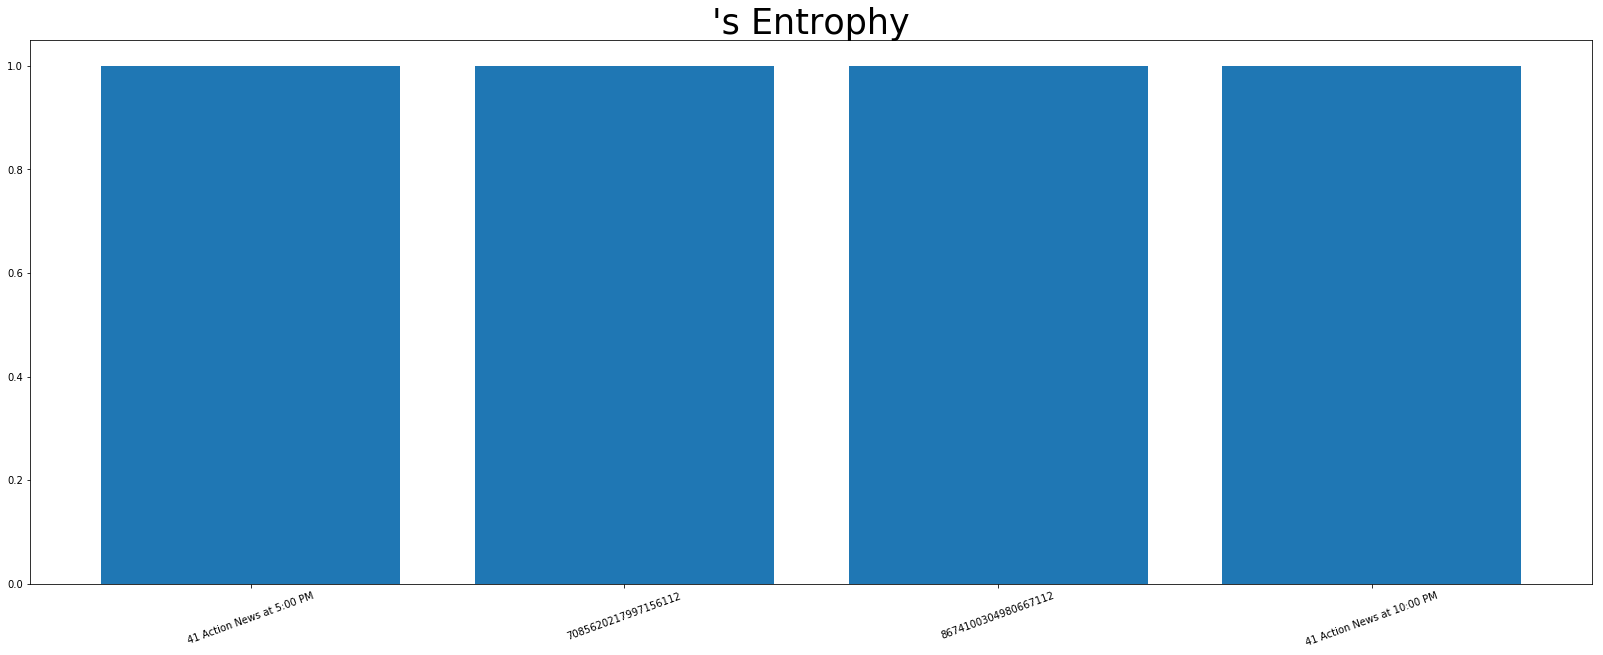

Entrophy is 2.000000


2.25

In [81]:
compute_entropy(query2program,"KSHB","'s Entrophy",20,top)

In [23]:
result2= rank2(query2program,6,8000)

In [24]:
print(result2)

[(-0.0, '10 Commandments'), (-0.0, "10 o'clock news"), (-0.0, '10 violent Women'), (-0.0, '100%'), (-0.0, '1127'), (-0.0, '127 hours'), (-0.0, '1517 to Paris'), (-0.0, '19 BET awards'), (-0.0, '2012 movie'), (-0.0, '2019 BET Awards'), (-0.0, '22 mile'), (-0.0, '28 days'), (-0.0, '28 weeks later'), (-0.0, '287'), (-0.0, '3 billboards'), (-0.0, '3 identical Strangers'), (-0.0, '447'), (-0.0, '478'), (-0.0, '494'), (-0.0, '4K Orange Is the New Black'), (-0.0, '5 headed Shark'), (-0.0, '634'), (-0.0, '7 Rings'), (-0.0, '70s channel'), (-0.0, '70s music channel'), (-0.0, '773'), (-0.0, '8 mile'), (-0.0, '943'), (-0.0, '944'), (-0.0, '981'), (-0.0, 'A Bronx Tale'), (-0.0, 'A Good Day to Die Hard'), (-0.0, 'A League of Their Own'), (-0.0, 'A Man Apart'), (-0.0, 'A Million Ways to Die in the West'), (-0.0, 'A Time to Kill'), (-0.0, 'A Walk in the Clouds'), (-0.0, 'A Walk to Remember'), (-0.0, 'A bugs life'), (-0.0, "A dog's purpose"), (-0.0, 'A thousand words'), (-0.0, 'A walk to remember'), (

[(-0.0, '10 Commandments'), (-0.0, "10 o'clock news"), (-0.0, '10 violent Women'), (-0.0, '100%'), (-0.0, '1127'), (-0.0, '127 hours'), (-0.0, '1517 to Paris'), (-0.0, '19 BET awards'), (-0.0, '2012 movie'), (-0.0, '2019 BET Awards'), (-0.0, '22 mile'), (-0.0, '28 days'), (-0.0, '28 weeks later'), (-0.0, '287'), (-0.0, '3 billboards'), (-0.0, '3 identical Strangers'), (-0.0, '447'), (-0.0, '478'), (-0.0, '494'), (-0.0, '4K Orange Is the New Black'), (-0.0, '5 headed Shark'), (-0.0, '634'), (-0.0, '7 Rings'), (-0.0, '70s channel'), (-0.0, '70s music channel'), (-0.0, '773'), (-0.0, '8 mile'), (-0.0, '943'), (-0.0, '944'), (-0.0, '981'), (-0.0, 'A Bronx Tale'), (-0.0, 'A Good Day to Die Hard'), (-0.0, 'A League of Their Own'), (-0.0, 'A Man Apart'), (-0.0, 'A Million Ways to Die in the West'), (-0.0, 'A Time to Kill'), (-0.0, 'A Walk in the Clouds'), (-0.0, 'A Walk to Remember'), (-0.0, 'A bugs life'), (-0.0, "A dog's purpose"), (-0.0, 'A thousand words'), (-0.0, 'A walk to remember'), (

[(-0.0, '10 Commandments'), (-0.0, "10 o'clock news"), (-0.0, '10 violent Women'), (-0.0, '100%'), (-0.0, '1127'), (-0.0, '127 hours'), (-0.0, '1517 to Paris'), (-0.0, '19 BET awards'), (-0.0, '2012 movie'), (-0.0, '2019 BET Awards'), (-0.0, '22 mile'), (-0.0, '28 days'), (-0.0, '28 weeks later'), (-0.0, '287'), (-0.0, '3 billboards'), (-0.0, '3 identical Strangers'), (-0.0, '447'), (-0.0, '478'), (-0.0, '494'), (-0.0, '4K Orange Is the New Black'), (-0.0, '5 headed Shark'), (-0.0, '634'), (-0.0, '7 Rings'), (-0.0, '70s channel'), (-0.0, '70s music channel'), (-0.0, '773'), (-0.0, '8 mile'), (-0.0, '943'), (-0.0, '944'), (-0.0, '981'), (-0.0, 'A Bronx Tale'), (-0.0, 'A Good Day to Die Hard'), (-0.0, 'A League of Their Own'), (-0.0, 'A Man Apart'), (-0.0, 'A Million Ways to Die in the West'), (-0.0, 'A Time to Kill'), (-0.0, 'A Walk in the Clouds'), (-0.0, 'A Walk to Remember'), (-0.0, 'A bugs life'), (-0.0, "A dog's purpose"), (-0.0, 'A thousand words'), (-0.0, 'A walk to remember'), (

[(-0.0, '10 Commandments'), (-0.0, "10 o'clock news"), (-0.0, '10 violent Women'), (-0.0, '100%'), (-0.0, '1127'), (-0.0, '127 hours'), (-0.0, '1517 to Paris'), (-0.0, '19 BET awards'), (-0.0, '2012 movie'), (-0.0, '2019 BET Awards'), (-0.0, '22 mile'), (-0.0, '28 days'), (-0.0, '28 weeks later'), (-0.0, '287'), (-0.0, '3 billboards'), (-0.0, '3 identical Strangers'), (-0.0, '447'), (-0.0, '478'), (-0.0, '494'), (-0.0, '4K Orange Is the New Black'), (-0.0, '5 headed Shark'), (-0.0, '634'), (-0.0, '7 Rings'), (-0.0, '70s channel'), (-0.0, '70s music channel'), (-0.0, '773'), (-0.0, '8 mile'), (-0.0, '943'), (-0.0, '944'), (-0.0, '981'), (-0.0, 'A Bronx Tale'), (-0.0, 'A Good Day to Die Hard'), (-0.0, 'A League of Their Own'), (-0.0, 'A Man Apart'), (-0.0, 'A Million Ways to Die in the West'), (-0.0, 'A Time to Kill'), (-0.0, 'A Walk in the Clouds'), (-0.0, 'A Walk to Remember'), (-0.0, 'A bugs life'), (-0.0, "A dog's purpose"), (-0.0, 'A thousand words'), (-0.0, 'A walk to remember'), (

In [25]:
threshold = 2

list4 = [x[1] for x in result2 if (float(x[0]) <=threshold)]
# list5 = [x[1] for x in result2_small]
# list6 = set(list4 + list5)
training_pairs2 = [(x,find_max(query2program,x)) for x in list4]

In [ ]:
#TODO make query a list
#TODO change to log base 2
#TODO make a spread sheet

In [26]:
print(len(training_pairs),len(training_pairs2))

10352 8000
10352 8000
10352 8000
10352 8000


In [212]:
# print(training_pairs2)

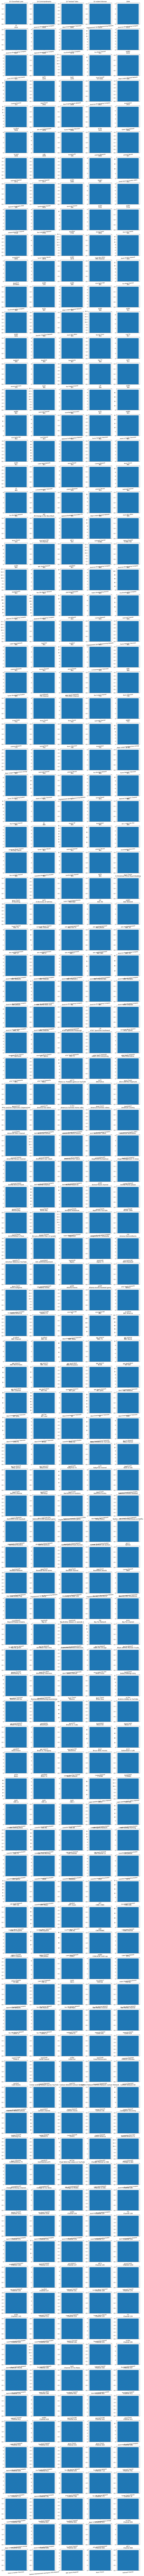

In [170]:
fig, ax = plt.subplots(nrows=100, ncols=5,figsize=(20,390))
idx = 0
top = 6
for row in ax:
    for col in row:
        tmp = Counter(dict(query2company[training_pairs[idx][0]]))
        data = tmp.most_common(top)
        x = np.arange(len(data))
        freq = [y[1] for y in data]
        label = [y[0] for y in data]
#         print(x,label)
        col.set_xticks(x) 
        col.set_xticklabels(label,rotation=5,fontsize=10)
        col.bar(x,height=freq)
        col.set_title(training_pairs[idx][0])
        idx+=1

In [90]:
training_pairs[2073]

('YouTube African movie', 'QVC')

In [92]:
query2company["YouTube African movie"]

defaultdict(int, {'QVC': 2, 'Willow Cricket': 1})

In [244]:
type(query2company)

collections.defaultdict

# Svae to Spread Sheet

In [27]:
import xlwt
wb = xlwt.Workbook()
ws = wb.add_sheet('A Test Sheet')
ws.write(0,0,"Session")
ws.write(0,1,"Label (Most frequence channel)")
ws.write(0,2,"Total Count")
ws.write(0,3,"Entropy")
ws.write(0,4,"Channel Destinations")
for idx, each in enumerate(training_pairs):
    session = training_pairs[idx][0]
    entropy = result[idx][0]
    channel = training_pairs[idx][1]
    total_count = total(query2company[session])
    channel_destinations = dict(query2company[session])
    ws.write(idx+1,0,session)
    ws.write(idx+1,1,channel)
    ws.write(idx+1,2,total_count)
    ws.write(idx+1,3,entropy)
    data = Counter(channel_destinations)
    data = data.most_common(6)
    dests = ["%s:%d; "%(x[0],x[1]) for x in data]
    ws.write(idx+1,4,dests)


In [28]:
wb.save('processed_ranked_session2channel_all.xls')

In [29]:
# save as json
sessions = [training_pairs[idx][0] for idx,_ in enumerate(training_pairs)]
json_data = {"query":sessions,"channels":[query2company[each] for each in sessions]}
with open('query2channel.json', 'w') as f:
    json.dump(json_data, f)

In [30]:
wb = xlwt.Workbook()
ws = wb.add_sheet('Sheet')
ws.write(0,0,"Session")
ws.write(0,1,"Label (Most frequence program)")
ws.write(0,3,"Entropy")
ws.write(0,4,"Program Destinations")
for idx, each in enumerate(training_pairs2):
    session = training_pairs2[idx][0]
    entropy = result2[idx][0]
    program = training_pairs2[idx][1]
    total_count = total(query2program[session])
    program_destinations = dict(query2program[session])
    ws.write(idx+1,0,session)
    ws.write(idx+1,1,program)
    ws.write(idx+1,2,total_count)
    ws.write(idx+1,3,entropy)
    data = Counter(program_destinations)
    data = data.most_common(6)
    dests = ["%s:%d; "%(x[0],x[1]) for x in data]
    ws.write(idx+1,4,dests)

In [31]:
wb.save('processed_ranked_session2program_8000.xls')

In [32]:
sessions2 = [training_pairs2[idx][0] for idx,_ in enumerate(training_pairs2)]
json_data2 = {"query":sessions2,"programs":[query2program[each] for each in sessions2]}
with open('query2program.json', 'w') as f:
    json.dump(json_data2, f)

In [ ]:
print(training_pairs[:10])

In [ ]:
# save both channel and program as json
all_training_pairs = training_pairs + training_pairs2

sessions = [training_pairs[idx][0] for idx,_ in enumerate(all_training_pairs)]
json_data = {"query":sessions,"programs":[query2company[each] for each in sessions]}
with open('query2channel.json', 'w') as f:
    json.dump(json_data, f)

In [38]:
# pick some examplar data for testing
json_data_t = {}
sums = 0
for j in json_data["channels"]:
    count = total(j)
    if count>8:
        sums += 1
print(sums)

2674
2674
2674
2674


In [41]:
sums = 0
for j in json_data2["programs"]:
    count = total(j)
    if count>8:
        sums += 1
print(sums)

1163
1163
1163
1163
